**<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 25px;">
Product Price Recommendation for Online Sellers </span>**

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 20px;"> 1. Modules Imported </span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 20px;"> 2. Dataset </span>

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> The dataset is taken from Kaggle- which is an open source dataset. This data contains the details regarding various items, throughout different countries which would help us in recommendation of the price of the items. This contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based store<br>
    <b>Dataset Link :</b> https://www.kaggle.com/datasets/carrie1/ecommerce-data </span>

In [2]:
df = pd.read_csv(r"/kaggle/input/ecommerce-data/data.csv", encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 20px;"> 3. Data Preprocessing  </span>

In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Checking Datatypes of all columns </span>

In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Checking for Null Values in the dataset.<br> Description, and CustomerID has null/missing values </span>

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> CustomerID usually wouldn't affect price recommendations. So its better to remove the rows which doesn't have CustomerID </span>

In [8]:
df.dropna(subset=['CustomerID'],axis = 0, inplace=True)

In [9]:
df.shape

(406829, 8)

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Null/missing values have been removed </span>

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Date Formatting </span>

In [12]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')
df.drop(['InvoiceDate','Date'],axis=1,inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Checking Some Statistics </span>

In [15]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [16]:
columns=["Description", "Quantity", "UnitPrice" ]

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Analyzing Items </span>

In [17]:
df_max = df[df['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"][columns]
df_max

,Description,Quantity,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
49,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
66,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
220,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55
262,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55
...,...,...,...
403929,WHITE HANGING HEART T-LIGHT HOLDER,1,2.95
403964,WHITE HANGING HEART T-LIGHT HOLDER,2,2.95
404428,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95
405907,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55


In [18]:
#check quantity of all different items
df_quan = df.groupby('Description')['Quantity'].sum().reset_index()
df_quan.columns = ['Description', 'Total Quantity']
df_quan

,Description,Total Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1883
2,DOLLY GIRL BEAKER,2391
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,4850
3892,ZINC TOP 2 DOOR WOODEN SHELF,5
3893,ZINC WILLIE WINKIE CANDLE STICK,2595
3894,ZINC WIRE KITCHEN ORGANISER,25


In [19]:
df_quan_top15 = df_quan.nlargest(15, 'Total Quantity')
df_quan_top15

,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


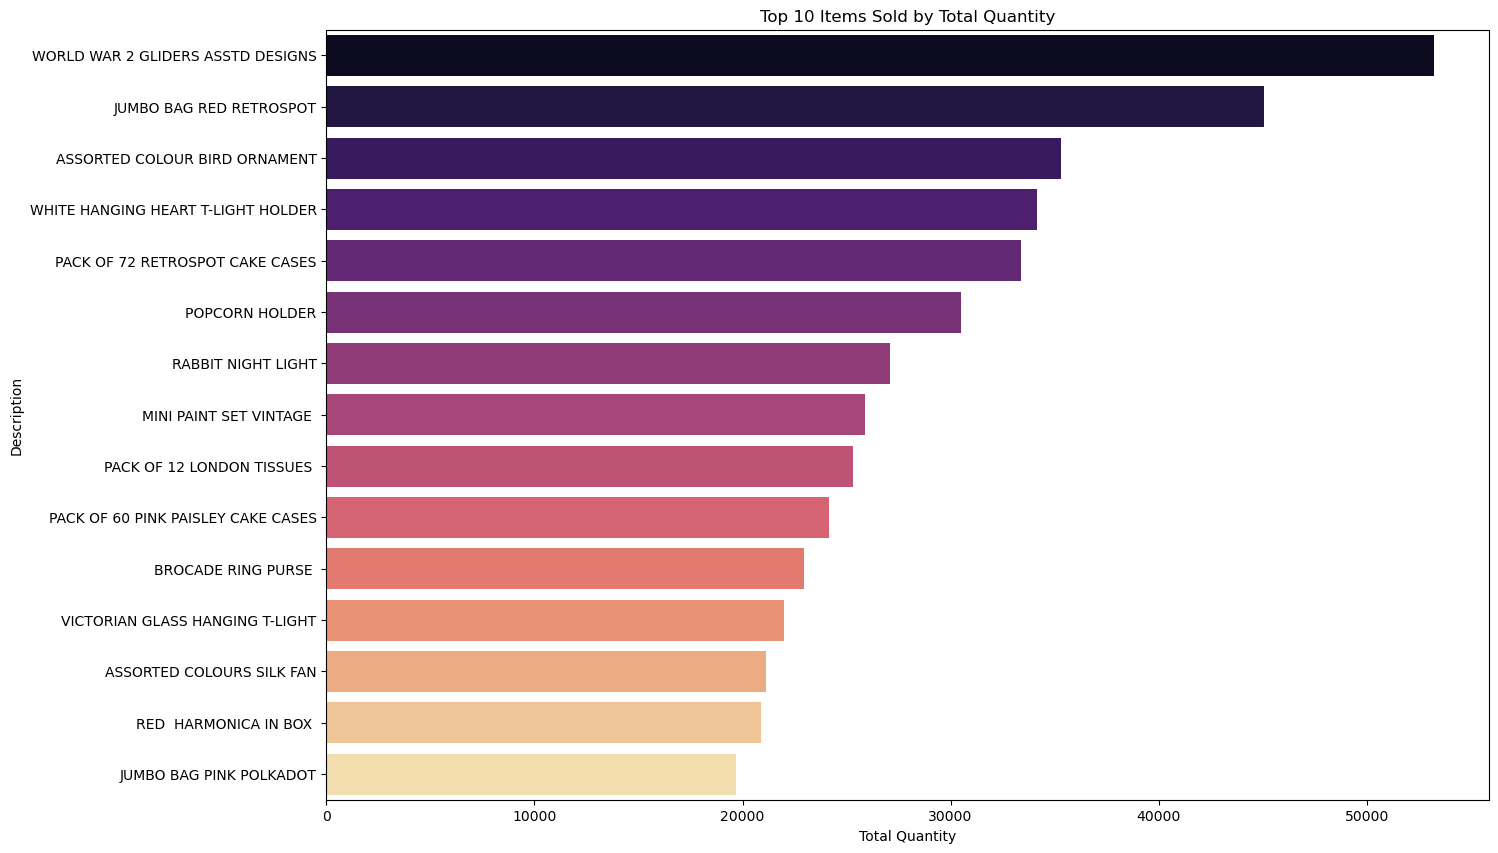

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_quan_top15, x="Total Quantity", y="Description", capsize=3, palette="magma")
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [22]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> HeatMap Analysis </span>

/tmp/ipykernel_33/3358332889.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f")


<Axes: >

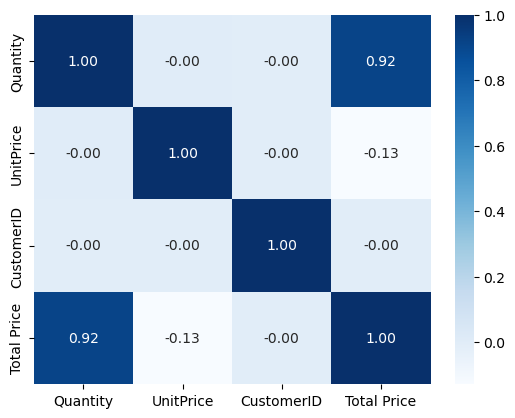

In [23]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f")

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> From heatmap analysis, we can see that Total Price is in high correlation with Quantity (more over Total Price has been manipulated over quantity) only. </span>

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;"> Performing Encoding on the non-numerical columns, which may be necessary for the price recommendation. </span>

In [25]:
label_en = LabelEncoder()
df['StockCode_Encode'] = label_en.fit_transform(df['StockCode'])
df['Invoice_Encode'] = label_en.fit_transform(df['InvoiceNo'])

In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price,StockCode_Encode,Invoice_Encode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30,3249,0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2649,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00,2855,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2803,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2802,0
...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20,1470,18535
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60,1746,18535
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60,2086,18535
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60,2087,18535


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 20px;">4. Seperating the dataset for Regression Analysis </span>

In [27]:
X = df.drop(columns=['InvoiceNo','StockCode','Total Price','Month-Year','Description','CustomerID','Country'])
y = df['Total Price']

In [28]:
X

,Quantity,UnitPrice,StockCode_Encode,Invoice_Encode
0,6,2.55,3249,0
1,6,3.39,2649,0
2,8,2.75,2855,0
3,6,3.39,2803,0
4,6,3.39,2802,0
...,...,...,...,...
406824,12,0.85,1470,18535
406825,6,2.10,1746,18535
406826,4,4.15,2086,18535
406827,4,4.15,2087,18535


In [29]:
X.dtypes

Quantity              int64
UnitPrice           float64
StockCode_Encode      int64
Invoice_Encode        int64
dtype: object

In [30]:
y

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
406824    10.20
406825    12.60
406826    16.60
406827    16.60
406828    14.85
Name: Total Price, Length: 406829, dtype: float64

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 22px;">5. Seperating the dataset for Regression Analysis </span>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px;">Standardization to reduce the differ of various input features </span>

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-0.03636296, -0.00707983, -0.45122233,  0.92579004],
       [-0.03996953, -0.00707983, -0.68693822,  0.62134974],
       [-0.03996953, -0.04072785, -0.21550644,  0.62098967],
       ...,
       [-0.03636296, -0.03766894,  0.22749729, -0.62431701],
       [-0.03636296, -0.01865049, -0.81012642, -0.4793883 ],
       [-0.03636296, -0.0183845 , -0.82670945, -0.72189634]])

In [34]:
X_test

array([[-3.63629552e-02,  5.94182369e-02,  1.24853798e+00,
        -1.51333312e+00],
       [-2.91498090e-02,  6.21978448e-03,  3.35286970e-01,
         4.08007477e-01],
       [-5.80023938e-02, -3.50090161e-02, -1.28748071e+00,
         1.93759047e+00],
       ...,
       [-2.97224273e-04, -4.07278497e-02,  3.02120916e-01,
        -7.97691356e-01],
       [-2.91498090e-02, -4.07278497e-02, -8.16048933e-01,
         8.18128717e-01],
       [-3.99695283e-02,  6.67330241e-02, -1.06532260e-01,
        -8.56022911e-01]])

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 22px;">6. Model Analysis :</span>

In [35]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    Lasso(alpha = 10),
    Ridge(alpha = 10)
]

In [36]:
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    r2_value = r2_score(y_test,y_pred)
    print(f"{m.__class__.__name__} R2 Score: {r2_value}")

LinearRegression R2 Score: -0.07562386632369478
RandomForestRegressor R2 Score: 0.6063781156251762
Lasso R2 Score: 0.013488869789706426
Ridge R2 Score: -0.07559547874478079


<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 20px; color: green"><b>Random Forest Regressor </b> overall gives the best R2 Score out of the models evaluated. The R2 value of Random Forest Regressor is more closer to 1, than others. RF Regressor is able to understand and generalize the unseen (test) data well. It also has the ability to understand the non linear relationships in data points. </span>

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px">Analysis for Lasso Model, which is second best in this scenario</span>

In [37]:
r2_lasso = []

In [38]:
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)

In [39]:
r2_lasso

[0.013488869789706426,
 0.09550456722506506,
 0.16896904291995474,
 0.23388229693001505,
 0.2902443292214858,
 0.33805513979436896,
 0.36401984528496445,
 0.36665930251864154,
 0.36859644778417444,
 0.36983128108156305,
 0.37036380241080724,
 0.3701940117719069,
 0.36932190916486274,
 0.36774749458967393,
 0.3654707680463408,
 0.3624917295348635,
 0.35881037905524193,
 0.35442671660747593,
 0.3493407421915654,
 0.3435524558075108,
 0.3370618574553118,
 0.3298689471349686,
 0.3219737248464811,
 0.313376190589849,
 0.304076344365073,
 0.29407418617215253,
 0.2833697160110876,
 0.27196293388187864,
 0.25985383978452514,
 0.24704243371902723,
 0.23352871568538525,
 0.21931268568359885,
 0.20439434371366805,
 0.18877368977559306,
 0.17245072386937355,
 0.15542544599500985,
 0.13769785615250185,
 0.11926795434184978,
 0.10013574056305297,
 0.08030121481611219,
 0.05976437710102678,
 0.0385252274177974,
 0.016583765766423397,
 -4.082751379641536e-06,
 -4.082751379641536e-06,
 -4.0827513796415

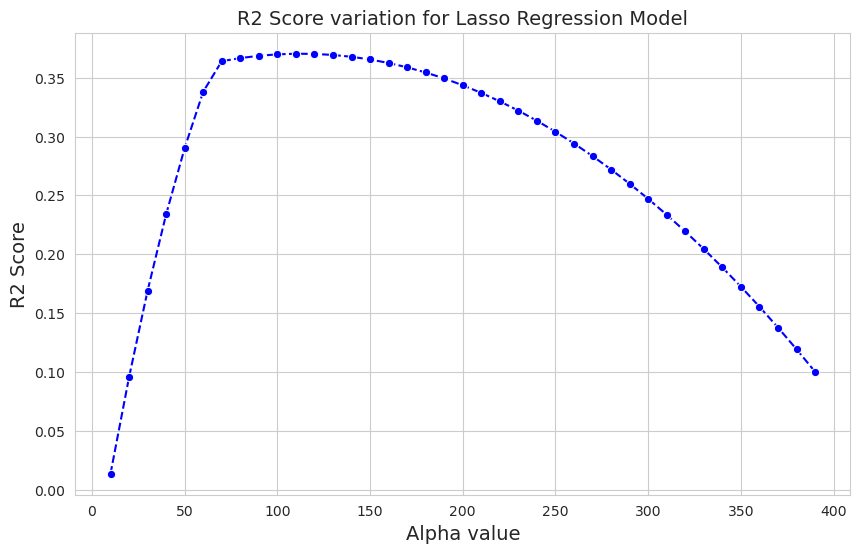

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px">The model gets the max R2 Score of 0.37 (app.) but decreases when alpha further increases</span>

In [41]:
n_estim = list(range(20,160,10))

In [42]:
random_forest_R = []

In [43]:
for n in n_estim:
    rf_R = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_R.fit(X_train,y_train)
    y_pred_ = rf_R.predict(X_test)

    r2_value = r2_score(y_test,y_pred_)
    random_forest_R.append(r2_value)

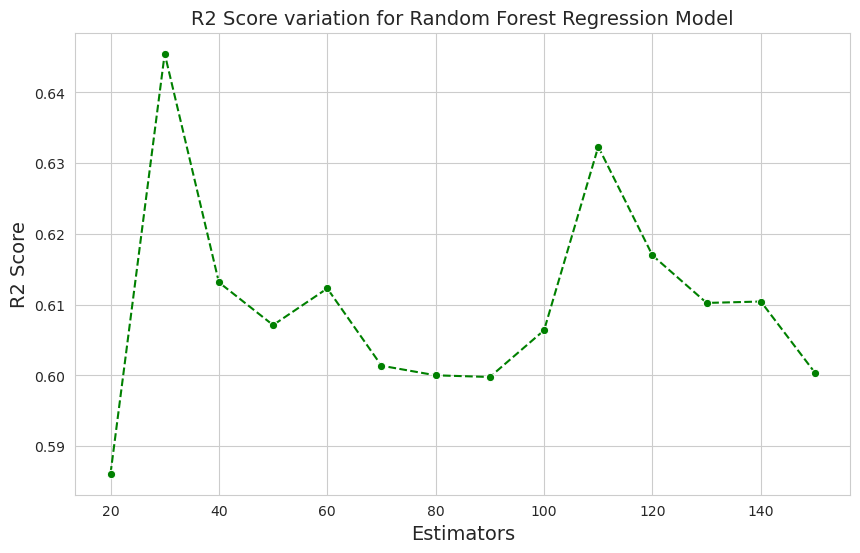

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_estim, y=random_forest_R, marker='o', color='green', linestyle = 'dashed')
plt.title('R2 Score variation for Random Forest Regression Model',fontsize=14)
plt.xlabel('Estimators',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

In [45]:
random_forest_R

[0.5861008604193167,
 0.6454790289192889,
 0.6131599756744083,
 0.6071153149721392,
 0.6122964651678325,
 0.601370091971726,
 0.6000138614298374,
 0.5997773505701349,
 0.6063781156251762,
 0.6323310708616088,
 0.6169698067035025,
 0.6102471528417107,
 0.6104448044356365,
 0.6003625065444815]

In [46]:
max(random_forest_R)

0.6454790289192889

<span style="font-family: 'Bookman Old Style', sans-serif; font-size: 16px">The model gets the max R2 Score of 0.645 (app.) There is fluctuation for the R2 Scores but the optimal number of trees in the RF is around 30. </span>